In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import plotly.express as px
import textwrap

In [3]:
#setup visualization style
plt.style.use('default')
sns.set_style("whitegrid")

In [ ]:
#Load world population dataset
dataFrame = pd.read_csv('world_population_data.csv')

In [9]:
#Display the first 5 rows of the dataframe
dataFrame.head(5)

,rank,cca3,country,continent,2023 population,2022 population,2020 population,2015 population,2010 population,2000 population,1990 population,1980 population,1970 population,area (km²),density (km²),growth rate,world percentage
229,230,MSR,Montserrat,North America,4386,4390,4500,5059,4938,5138,10805,11452,11402,102.00,43,-0.09%,0.00%
230,231,FLK,Falkland Islands,South America,3791,3780,3747,3408,3187,3080,2332,2240,2274,12173.00,0,0.29%,0.00%
231,232,NIU,Niue,Oceania,1935,1934,1942,1847,1812,2074,2533,3637,5185,261.00,7,0.05%,0.00%
232,233,TKL,Tokelau,Oceania,1893,1871,1827,1454,1367,1666,1669,1647,1714,12.00,189,1.18%,0.00%
233,234,VAT,Vatican City,Europe,518,510,520,564,596,651,700,733,752,0.44,1177,1.57%,0.00%


In [10]:
#Display summary information about the dataframe
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

In [31]:
# Ensure numeric columns are proper type
population_columns = ['1970 population','1980 population','1990 population','2000 population','2010 population','2015 population','2020 population','2022 population','2023 population']
for col in population_columns:
    dataFrame[col] = pd.to_numeric(dataFrame[col], errors='coerce')
    
# Area & density
dataFrame['area (km²)'] = pd.to_numeric(dataFrame['area (km²)'], errors='coerce')
dataFrame['density (km²)'] = pd.to_numeric(dataFrame['density (km²)'], errors='coerce')

# Growth rate: safely handle numeric, string, or missing values
dataFrame['growth rate'] = dataFrame['growth rate'].astype(str).str.rstrip('%')
dataFrame['growth rate'] = pd.to_numeric(dataFrame['growth rate'], errors='coerce')

# Melt dataset for animation
dataFrame_melt = dataFrame.melt(id_vars=['country','cca3','continent'], value_vars=population_columns, 
                  var_name='year', value_name='population')
dataFrame_melt['year'] = dataFrame_melt['year'].str.extract('(\d+)').astype(int)


<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_11672/87872857.py:17: SyntaxWarning: invalid escape sequence '\d'
  dataFrame_melt['year'] = dataFrame_melt['year'].str.extract('(\d+)').astype(int)


# Descriptive Statistics

In [32]:
total_population = dataFrame['2023 population'].sum()
print(f"Global population 2023: {total_population:,}")

Global population 2023: 8,043,615,390


In [36]:
# Top 10 countries by 2023 population
top10 = dataFrame.nlargest(10, '2023 population')[['country','2023 population']]
print("Top 10 countries by population:")
print(top10.to_string(index=False))

Top 10 countries by population:
      country  2023 population
        India       1428627663
        China       1425671352
United States        339996563
    Indonesia        277534122
     Pakistan        240485658
      Nigeria        223804632
       Brazil        216422446
   Bangladesh        172954319
       Russia        144444359
       Mexico        128455567


In [37]:
# Continent population
continent_population = dataFrame.groupby('continent')['2023 population'].sum().sort_values(ascending=False)
print("\nPopulation by continent:")
print(continent_population)


Population by continent:
continent
Asia             4751819588
Africa           1460476458
Europe            741869197
North America     604155369
South America     439719009
Oceania            45575769
Name: 2023 population, dtype: int64


# Visualization

/tmp/ipykernel_11672/420773359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='2023 population', data=top10, palette='viridis')


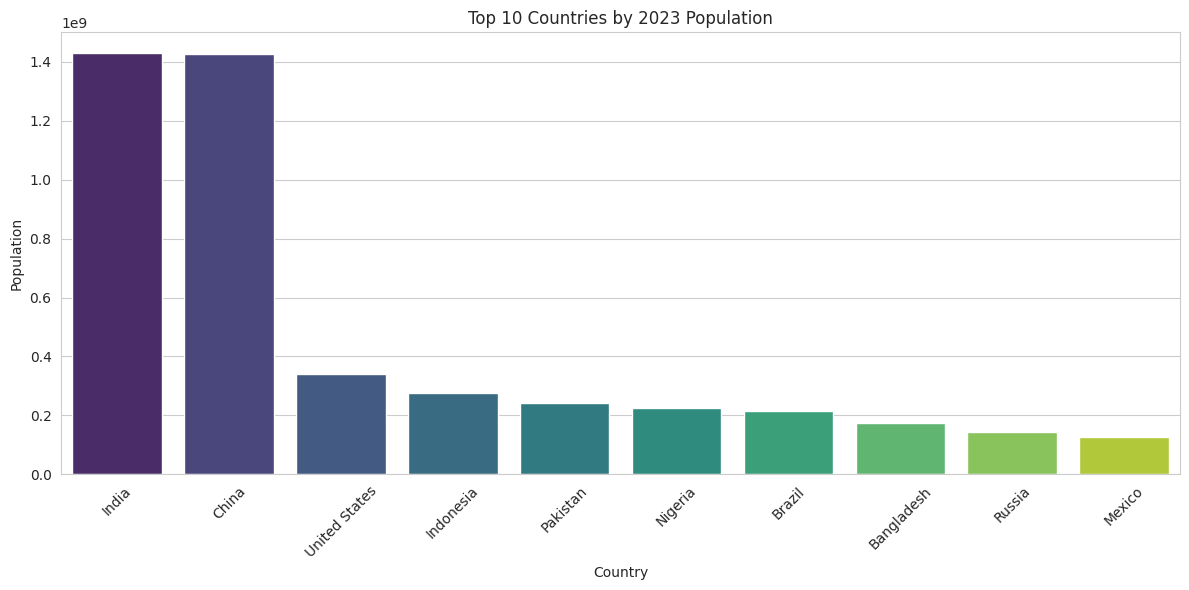

In [38]:
# Top 10 countries bar chart
plt.figure(figsize=(12,6))
sns.barplot(x='country', y='2023 population', data=top10, palette='viridis')
plt.title("Top 10 Countries by 2023 Population")
plt.ylabel("Population")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

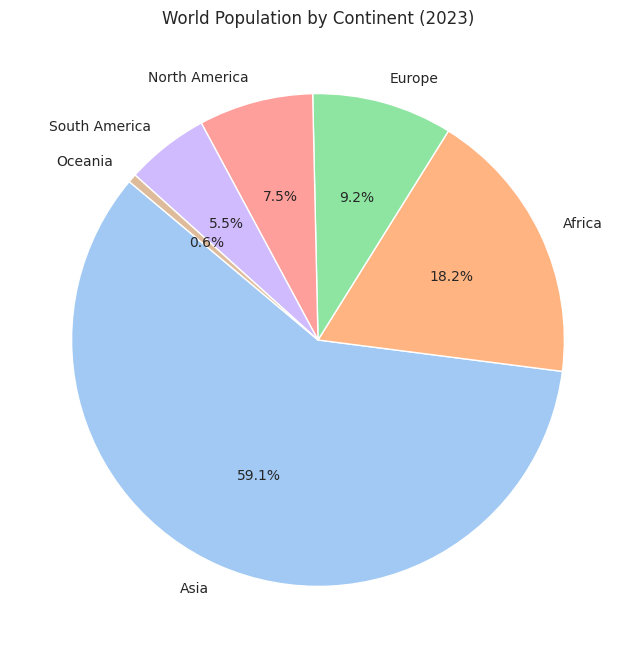

In [39]:
# Continent population pie chart
plt.figure(figsize=(8,8))
plt.pie(continent_population, labels=continent_population.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("World Population by Continent (2023)")
plt.show()

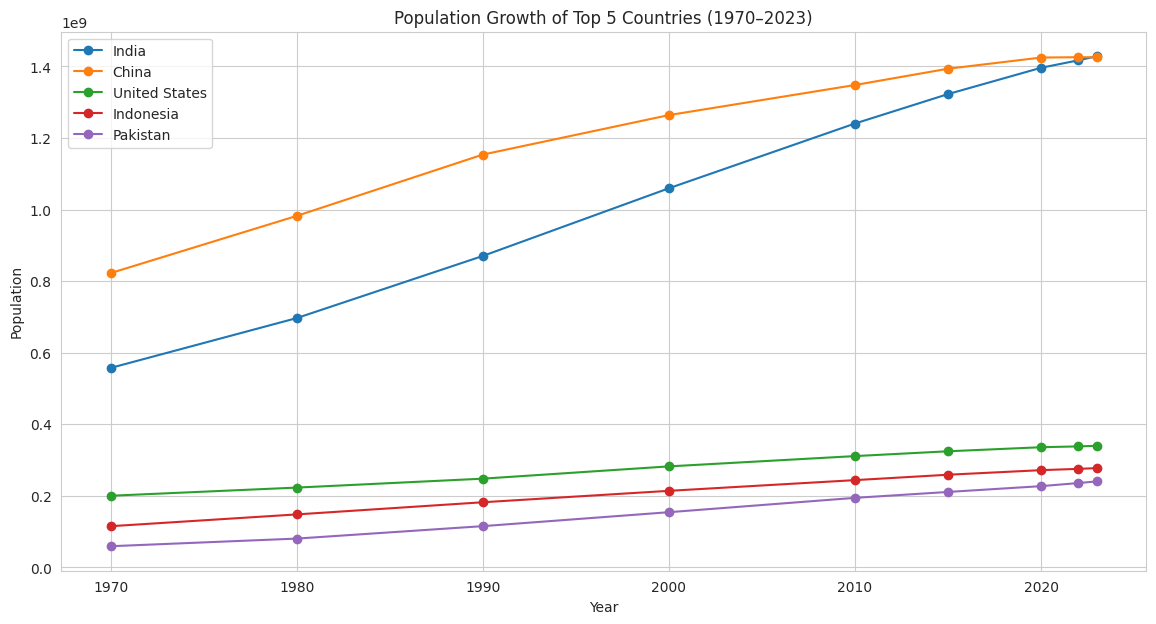

In [41]:
# Population growth line chart (top 5 countries)
top5 = dataFrame.nlargest(5, '2023 population')
years = [1970,1980,1990,2000,2010,2015,2020,2022,2023]

plt.figure(figsize=(14,7))
for idx, row in top5.iterrows():
    plt.plot(years, row[population_columns], marker='o', label=row['country'])
plt.title("Population Growth of Top 5 Countries (1970–2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()


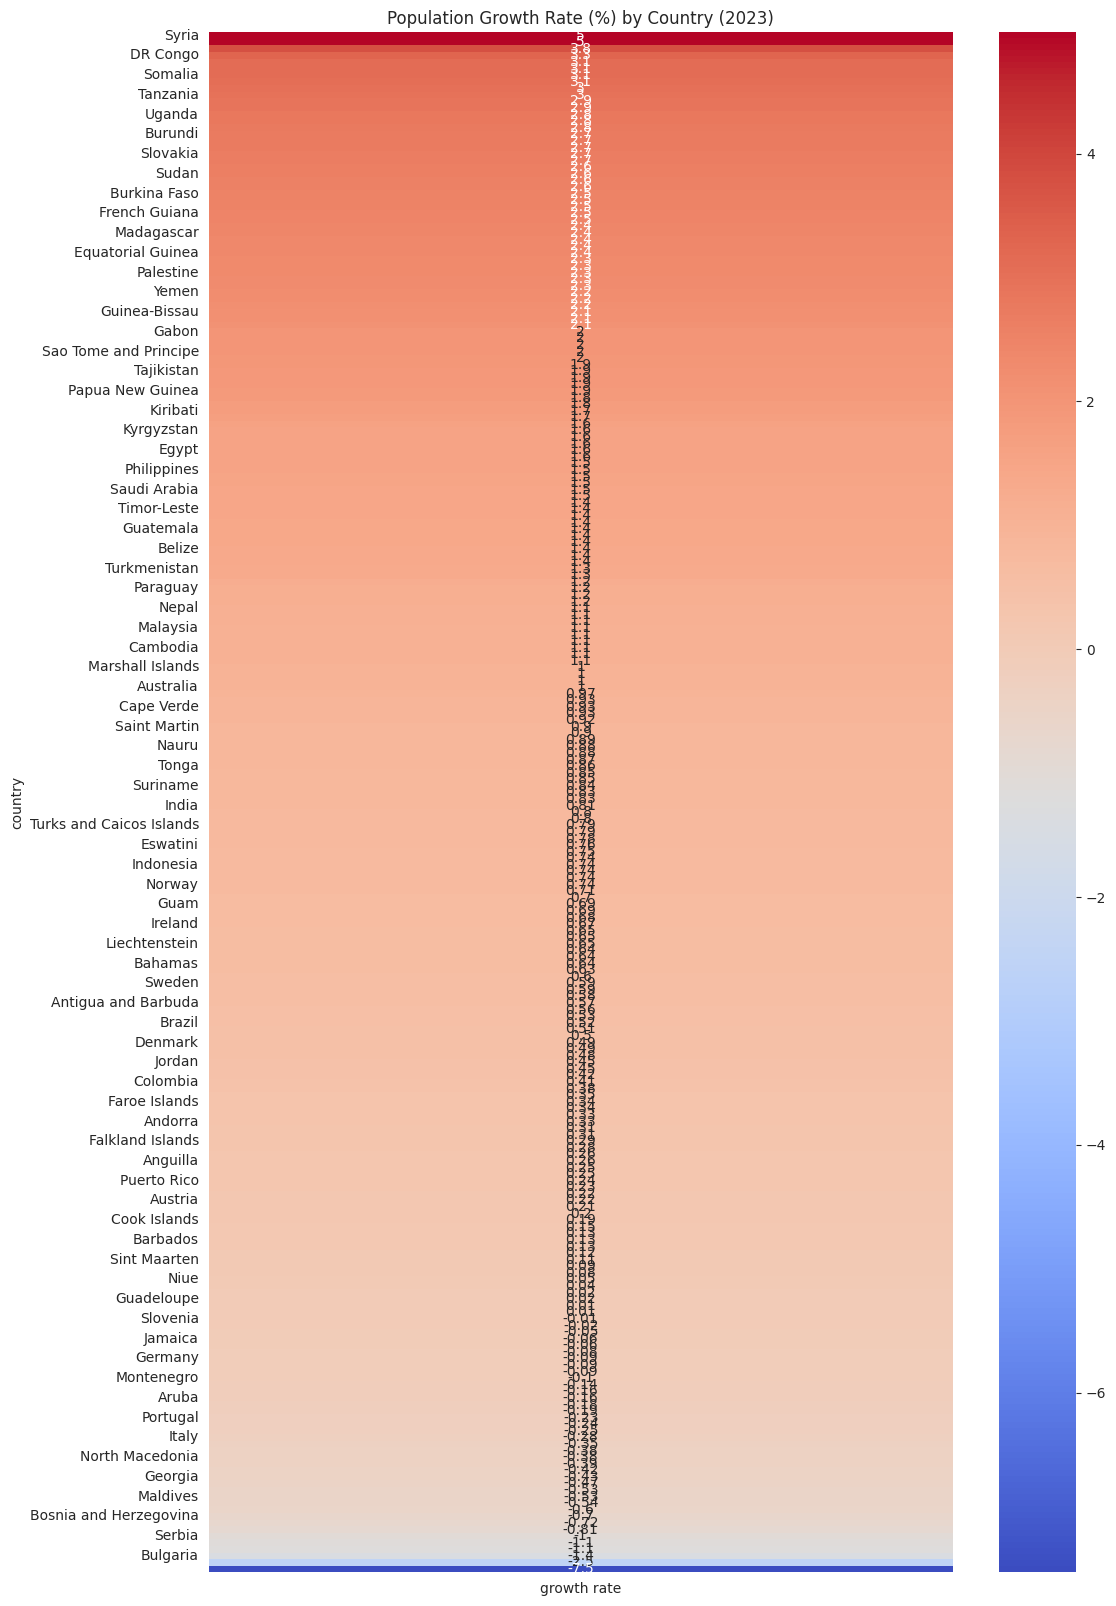

In [42]:
# Growth rate heatmap for all countries
plt.figure(figsize=(12,20))
growth_sorted = dataFrame.sort_values('growth rate', ascending=False)
sns.heatmap(growth_sorted[['country','growth rate']].set_index('country'), annot=True, cmap='coolwarm', cbar=True)
plt.title("Population Growth Rate (%) by Country (2023)")
plt.show()

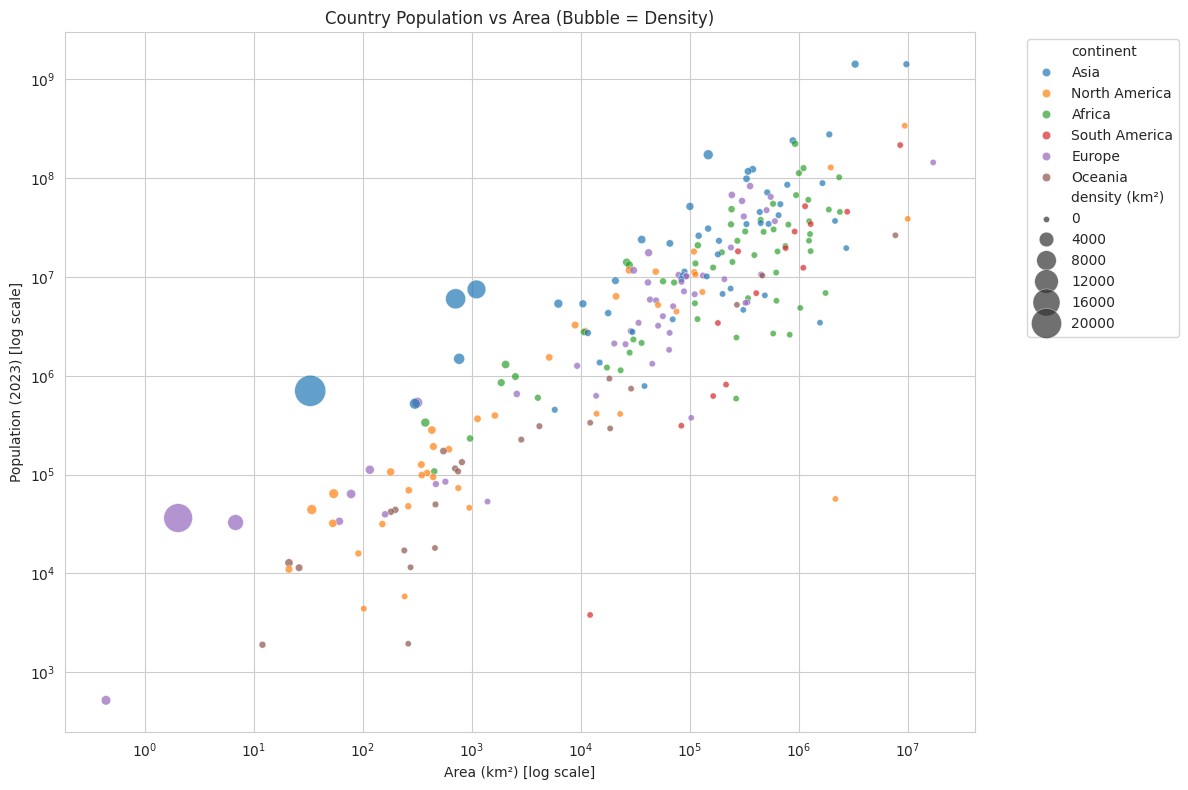

In [44]:
# Scatter plot: Population vs Area (bubble size = density)
plt.figure(figsize=(12,8))
sns.scatterplot(data=dataFrame, x='area (km²)', y='2023 population', size='density (km²)', hue='continent', palette='tab10', sizes=(20,500), alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Area (km²) [log scale]")
plt.ylabel("Population (2023) [log scale]")
plt.title("Country Population vs Area (Bubble = Density)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

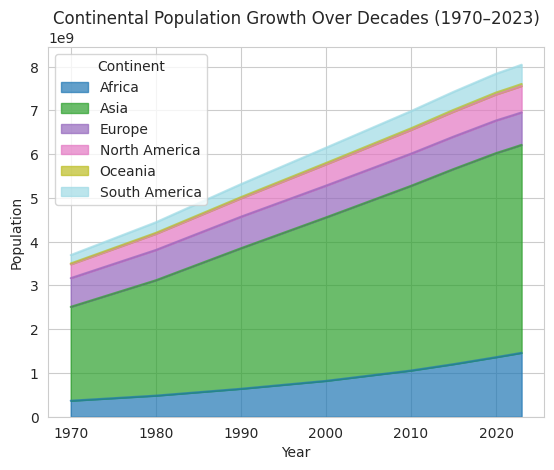

In [50]:
# Stacked area chart: continental population growth over decades
continent_years = dataFrame.groupby('continent')[population_columns].sum().T
continent_years.index = [int(col.split()[0]) for col in continent_years.index]
plt.figure(figsize=(14,7))
continent_years.plot(kind='area', stacked=True, cmap='tab20', alpha=0.7)
plt.title("Continental Population Growth Over Decades (1970–2023)")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title='Continent')
plt.grid(True)
plt.show()

In [51]:
# Animated population growth map using Plotly
# Melt dataset for animation
df_melt = dataFrame.melt(id_vars=['country','cca3','continent'], value_vars=population_columns, 
                  var_name='year', value_name='population')
df_melt['year'] = df_melt['year'].str.extract('(\d+)').astype(int)

fig = px.choropleth(df_melt, locations='cca3', color='population', hover_name='country',
                    animation_frame='year', color_continuous_scale='Viridis',
                    title='World Population Growth Animation (1970–2023)',
                    labels={'population':'Population'})
fig.show()


<>:5: SyntaxWarning:

invalid escape sequence '\d'

<>:5: SyntaxWarning:

invalid escape sequence '\d'

/tmp/ipykernel_11672/3577074873.py:5: SyntaxWarning:

invalid escape sequence '\d'



# Interactive Dashboard Dataset (Plotly)

In [48]:
fig = px.scatter(dataFrame, x='area (km²)', y='2023 population',
                 size='density (km²)', color='continent',
                 hover_name='country', size_max=60,
                 log_x=True, log_y=True,
                 title="Interactive Population vs Area (Bubble = Density)")
fig.show()

# Save Dashboard-ready CSV

In [49]:
dataFrame.to_csv("population_dashboard_ready.csv", index=False)
print("Dashboard-ready dataset saved as 'population_dashboard_ready.csv'")

Dashboard-ready dataset saved as 'population_dashboard_ready.csv'
